In [3]:
# importing required libraries
import numpy as np
import pandas as pd
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import datetime
import fnmatch
from matplotlib import dates
import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)
# matplotlib.rc('font'=  serif='cm10', weight ='bold',size="30")
matplotlib.rcParams["savefig.bbox"]  ="tight"
matplotlib.rcParams["figure.titlesize"]  =24
matplotlib.rcParams["figure.titleweight"]  ="bold"
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
matplotlib.rcParams['axes.linewidth'] = 2 
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['axes.linewidth'] = 2 
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['ytick.major.width'] = 4
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams["ytick.major.size"] = 9
matplotlib.rcParams.update({'legend.fontsize':22})
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


In [4]:
# g2_header =['Year',
#  'Day',
#  'Hour',
#  'Minute',
#  'Field_magnitude_average','BZ,nT(GSM)',
#  'Speed,km/s',
#  'Proton Density',
# 'Electricfield,mV',
#  'SYM/H']


navalues =[9999,99999,999.9, 999999.99,99999.9,999999.99, 
           99.99,99999.99,999.99,99999.99, 99.99000,999999.99,999999.99,99999.99]



In [5]:
low_res_header = ['YEAR', 'DOY','Hour','Scalar_B','Proton_Density N/cm^3','Kp_index',"Dst_index, nT","F10.7_index"]

# Reading Solargeomag_2018_low.txt as a csv file
gdf = pd.read_csv(r"Solargeomag_2018_low.txt" , delim_whitespace=True, skiprows=13, names =low_res_header, na_values =navalues)



In [6]:
#Convert YEAR< DOY and HOUR to Datetime Correctly
index = pd.to_datetime(gdf["YEAR"] * 100000 + gdf["DOY"] * 100 + gdf["Hour"],
                       ) 

gdf.set_index(index, inplace =True)
gdf["2018-03":"2018-06"]
gdf["UT"]=gdf.index



In [7]:
g2_header =['Year',
 'Day',
 'Hour',
 'Minute',
 'Field_magnitude_average','BZ,nT(GSM)',
 'Speed,km/s',
 'Proton Density',
'Electricfield,mV',
 'SYM/H']
# Reading solargeomag_2018_high.txt" as a csv file.
gdf2= pd.read_csv(r"solargeomag_2018_high.txt" , sep ='\s+', 
                  names = g2_header, na_values =['9999', '99999.9', '*9999*.99',
                                                 '99999','999.99','99999', '99.99000'], skiprows=15, 
                  parse_dates= {"UT" : ["Year","Day","Hour","Minute"]}, keep_date_col=True )
gdf2["UT"] = pd.to_datetime(gdf2.UT, format ="%Y %j %H %M")

gdf2.set_index(gdf2["UT"], inplace=True, drop= True)
gdf2["Time"] = (gdf2['Hour'].astype(str) + '.' + gdf2['Minute'].astype(str))
gdf2["Time"] =pd.to_numeric(gdf2["Time"])
gdf2.set_index("UT", inplace =True,drop=True)



In [8]:
gdf = pd.read_csv(r"solargeomag_2018_low.txt" , sep ='\s+', skiprows=13, names =low_res_header, na_values =navalues)

index = pd.to_datetime(gdf["YEAR"] * 100000 + gdf["DOY"] * 100 + gdf["Hour"], format="%Y%j%H") #Convert YEAR< DOY and HOUR to Datetime Correctly

gdf.set_index(index, inplace =True)



In [9]:
gdf[["Minute", 'Field_magnitude_average',
       'BZ,nT(GSM)', 'Speed,km/s', 'Proton Density', 'Electricfield,mV',
       'SYM/H', 'Time']]= gdf2[["Minute", 'Field_magnitude_average',
       'BZ,nT(GSM)', 'Speed,km/s', 'Proton Density', 'Electricfield,mV',
       'SYM/H', 'Time']]

In [10]:
"Create subplots"
# from matplotlib import pyplot as plt
from matplotlib import dates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
mon1=1

mon2=12
day1=1
day2=31
year=2018

In [11]:
# salu= salu[(salu.UT<9)| (salu.UT>21) ] 
months = dates.MonthLocator() #The matplotlib.ticker.MultipleLocator class is used for setting a tick for every integer
#  multiple of a base within the view interval


monthsFmt = dates.DateFormatter('%b') #Formatting to month form
h_fmt = dates.DateFormatter('%H')##Formatting to hour form
days = dates.DayLocator(interval=10)
dfmt = dates.DateFormatter('%d') ##Formatting to day form
hours =dates.HourLocator(byhour=range(0,24,6))    
mins = dates.MinuteLocator(byminute=None, interval=30)


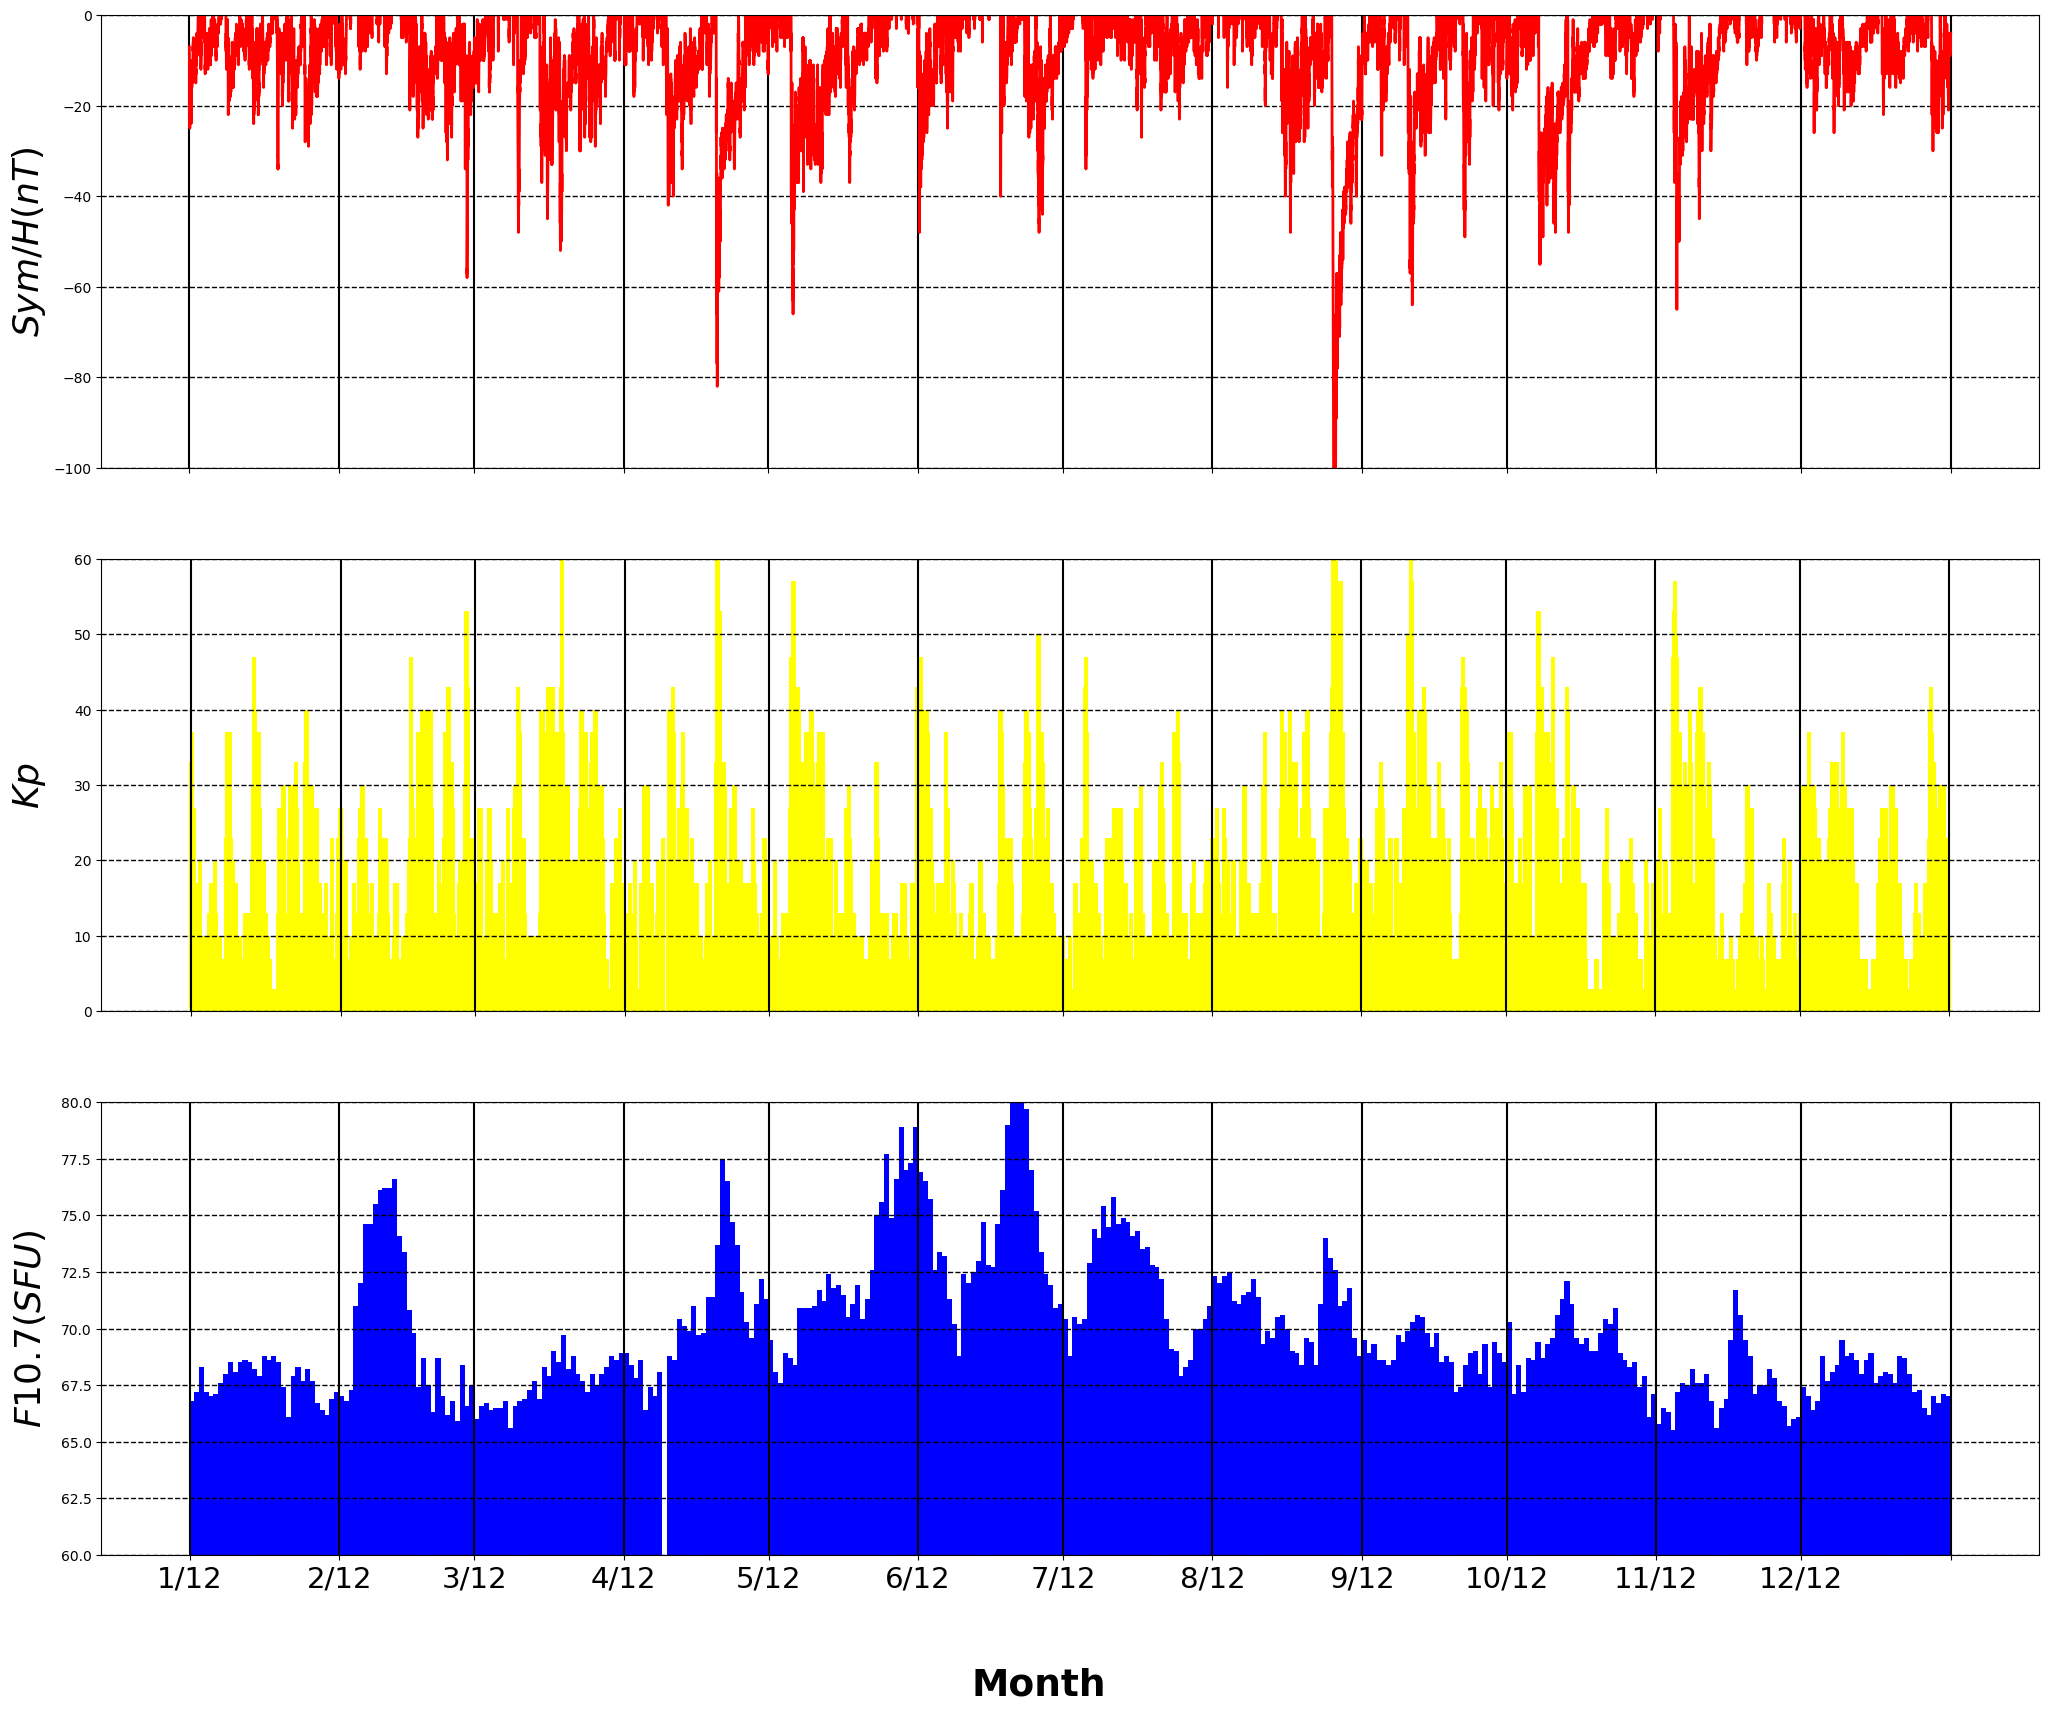

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(25, 20), facecolor='w', edgecolor='k')


axs[2].grid(b=True, which='major', axis='x',linewidth = 1.5, color='black')
axs[2].grid(b=True, which='major', axis='y',linestyle ='--',linewidth = 1, color='black')
axs[2].grid(b=True, which='minor', axis='both',linestyle ='--', linewidth = 1, color='black')
axs[1].grid(b=True, which='major', axis='x',linewidth = 1.5, color='black')
axs[1].grid(b=True, which='major', axis='y',linestyle ='--',linewidth = 1, color='black')
axs[1].grid(b=True, which='minor', axis='both',linestyle ='--', linewidth = 1, color='black')
axs[0].grid(b=True, which='major', axis='x',linewidth = 1.5, color='black')
axs[0].grid(b=True, which='major', axis='y',linestyle ='--',linewidth = 1, color='black')
axs[0].grid(b=True, which='minor', axis='both',linestyle ='--', linewidth = 1, color='black')


# This section of the code is responsible for setting x-axis label on each graph of respective index
axs[2].xaxis.set_major_locator(months)
axs[1].xaxis.set_major_locator(months)
axs[0].xaxis.set_major_locator(months)


# This section is used for setting label for the y-axis with font size of 26 and making the font bold.
axs[0].set_ylabel("$Sym/H(nT)$", size=28, weight ='bold')
axs[1].set_ylabel("$Kp$", size=28, weight ='bold')
axs[2].set_ylabel("$F10.7(SFU)$", size=28, weight ='bold')

# This section of the code is setting range for the y-axis.It takes one argument with a python list of two integers.
axs[0].set_ylim([-100,0])
axs[1].set_ylim([0,60])
axs[2].set_ylim([60,80])
x = ["1/12","2/12","3/12","4/12","5/12","6/12","7/12","8/12","9/12","10/12","11/12","12/12"]

x = pd.DataFrame(x,columns=["x"])
# This section of the code is for plot the graph. The bar is responsible for plotting bar graph and the plot method is for
# plotting a linear graph.
axs[1].bar(gdf.index,gdf['Kp_index'],lw=2,color="yellow")
axs[0].plot(gdf2['SYM/H'],lw=2,color="red")   
axs[2].bar(gdf.index, gdf['F10.7_index'],lw=2,width =0.1,color="blue")

axs[0].set_xticklabels(x["x"],fontsize= 21)
axs[1].set_xticklabels(x["x"],fontsize= 21)
axs[2].set_xticklabels(x["x"],fontsize= 21)

axs[0].tick_params(labelbottom = False)
axs[1].tick_params(labelbottom = False)

fig.text(0.5, 0.04, 'Month', ha='center',size = 27 ,weight = 'bold')# This line of code is for labeling the x-axis 'Month'.
fig.align_ylabels()
# Saving the graph as a png file(picture)
plt.savefig(str(year)+"imf.png", dpi=500)# this line of code is responsible for saving the graph as an image(png file).
plt.show()# this line of code is responsible for showing the plotted graph to the screen.


In [13]:
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [14]:
#     axs[i].set_xlim([datetime.datetime(year, mon1,day1 ,0,0), datetime.datetime(2018, mon2, day2,23,59)])